In [71]:
#Import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
odi = pd.read_csv(r'C:\Users\Raghavendra N\OneDrive\Official\Datasets\ODI_Analytics.csv')
print(odi.shape)

(55926, 8)


In [74]:
# ODI Data set

odi.head(n=10)

# Domain -sports
# Player's performance in individual matches -runs scored on a particular date in a match
# Granularity => Country, Player, Match Date

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,9-1-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,7-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,7-1-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135
5,Afghanistan,Mohammad Shahzad,55.0,87.30,7-7-2010,Sportpark Westvliet,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3147
6,Afghanistan,Mohammad Shahzad,37.0,80.43,10-9-2010,Gymkhana Club Ground,Kenya,../Matches/MatchScorecard_ODI.asp?MatchCode=3185
7,Afghanistan,Mohammad Shahzad,34.0,77.27,7-9-2010,Hazelaarweg,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3149
8,Afghanistan,Mohammad Shahzad,20.0,90.90,7-5-2010,VRA Ground,Kenya,../Matches/MatchScorecard_ODI.asp?MatchCode=3142
9,Afghanistan,Mohammad Shahzad,16.0,57.14,8-30-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3007


In [75]:
#find the data types of column
odi.dtypes

Country       object
Player        object
Runs         float64
ScoreRate    float64
MatchDate     object
Ground        object
Versus        object
URL           object
dtype: object

In [76]:
odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55926 entries, 0 to 55925
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    55926 non-null  object 
 1   Player     55926 non-null  object 
 2   Runs       55900 non-null  float64
 3   ScoreRate  55900 non-null  float64
 4   MatchDate  55926 non-null  object 
 5   Ground     55926 non-null  object 
 6   Versus     55926 non-null  object 
 7   URL        55926 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.4+ MB


#Clasiify the columns
 - Dimensions/Categorical - Country, Player, Versus, Ground, Versus 
 - Metrics - Runs , ScoreRate    
 - Location - Country, Ground, Versus
 - Dates - MatchDate
 - Text - URL

In [77]:
# get numeric columns
odi._get_numeric_data().columns

Index(['Runs', 'ScoreRate'], dtype='object')

In [78]:
# numeric columns analysis
odi.describe()

,Runs,ScoreRate
count,55900.000000,55900.000000
mean,22.241413,65.314208
std,25.558363,44.213423
min,0.000000,0.000000
25%,4.000000,37.500000
50%,13.000000,62.660000
75%,32.000000,87.500000
max,200.000000,600.000000


In [79]:
# describes all string columns or factors
odi.describe(include='object')

,Country,Player,MatchDate,Ground,Versus,URL
count,55926,55926,55926,55926,55926,55926
unique,22,1936,2757,178,25,3209
top,India,Sachin R Tendulkar,2-4-2007,Sharjah CA Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=3214
freq,6634,442,108,3581,7216,22


In [80]:
odi.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,9-1-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,7-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,7-1-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


### Derived Metrics

In [81]:
#extract multiple columns from existing columns
# Date -day, month, year, weekday, Quarter, weekday/weekend, hour details - morning ,noon, night

#Convert the object type to datetime object
odi['MatchDate']=pd.to_datetime(odi['MatchDate'],format='%m-%d-%Y')

In [82]:
odi.MatchDate.head()

0   2010-02-16
1   2009-09-01
2   2010-08-16
3   2010-07-10
4   2010-07-01
Name: MatchDate, dtype: datetime64[ns]

In [83]:
odi.MatchDate.describe()

<ipython-input-83-cad065c3a56d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  odi.MatchDate.describe()


count                   55926
unique                   2757
top       2007-02-04 00:00:00
freq                      108
first     1971-01-05 00:00:00
last      2011-10-28 00:00:00
Name: MatchDate, dtype: object

In [84]:
odi.MatchDate.min(),odi.MatchDate.max()

(Timestamp('1971-01-05 00:00:00'), Timestamp('2011-10-28 00:00:00'))

In [85]:
#Extract the columns

odi['year']=odi['MatchDate'].dt.year
odi['month']=odi['MatchDate'].dt.month_name()
odi['day']=odi['MatchDate'].dt.day
odi['weekday'] = odi['MatchDate'].dt.day_name()
odi['season'] = odi['MatchDate'].dt.quarter
print(odi[['MatchDate', 'year','month','day','weekday','season']].head(n=20))

    MatchDate  year      month  day    weekday  season
0  2010-02-16  2010   February   16    Tuesday       1
1  2009-09-01  2009  September    1    Tuesday       3
2  2010-08-16  2010     August   16     Monday       3
3  2010-07-10  2010       July   10   Saturday       3
4  2010-07-01  2010       July    1   Thursday       3
5  2010-07-07  2010       July    7  Wednesday       3
6  2010-10-09  2010    October    9   Saturday       4
7  2010-07-09  2010       July    9     Friday       3
8  2010-07-05  2010       July    5     Monday       3
9  2009-08-30  2009     August   30     Sunday       3
10 2010-08-17  2010     August   17    Tuesday       3
11 2011-08-09  2011     August    9    Tuesday       3
12 2010-07-03  2010       July    3   Saturday       3
13 2010-10-07  2010    October    7   Thursday       4
14 2011-08-07  2011     August    7     Sunday       3
15 2010-02-18  2010   February   18   Thursday       1
16 2010-02-18  2010   February   18   Thursday       1
17 2010-10

In [86]:
# Numerical columns can be categoriesed
# Bin them to different ranges
#Runs- Century, Fifty, Duckouts, Missed Century,type_of_run 
odi['Runs'].head()

#odi['Century']=[1 if run>=100 else 0 for run in odi['Runs']]
odi['Century']=odi['Runs'].apply(lambda x: 1 if x>=100 else 0)

#odi['Fifty']=[1 if run>=50 and run<=99 else 0 for run in odi['Runs']]
odi['Fifty']=odi['Runs'].apply(lambda x: 1 if x>=50 and x<=99 else 0)


#odi['Duckouts']=[1 if run==0 else 0 for run in odi['Runs']]
odi['Duckouts']=odi['Runs'].apply(lambda x: 1 if x==0 else 0)


#odi['Missed_Century']=[1 if run>=90 and run<=99 else 0 for run in odi['Runs']]
odi['Missed_Century']=odi['Runs'].apply(lambda x: 1 if x>=90 and x<=99 else 0)


To Tag Quarters Manually

'''
def return_quarter(m):
    if m in ('April','May','June'):
        return 'Q1'
    elif m in ('July','August','September'):
        return 'Q2'
    elif m in ('October','November','December'):
        return 'Q3'
    else:
        return 'Q4'
odi.month.apply(return_quarter)
'''

In [87]:
#Group by players and find count
pl_per=odi[['Player','Runs','Century','Fifty','Duckouts','Missed_Century']].groupby(['Player']).\
agg('sum')

In [88]:
#Maximum no of runs
pl_per.sort_values(by='Runs',ascending=False).head(10)

,Runs,Century,Fifty,Duckouts,Missed_Century
Player,,,,,
Sachin R Tendulkar,18111.0,48,95,20,18
Ricky T Ponting,13686.0,30,82,20,6
Sanath T Jayasuriya,13430.0,28,68,34,6
Inzamam-ul-Haq,11739.0,10,83,20,4
Jacques H Kallis,11372.0,17,84,17,8
Sourav C Ganguly,11363.0,22,72,16,6
Rahul Dravid,10889.0,12,83,13,4
Brian C Lara,10405.0,19,63,16,4
D P Mahela Jayawardene,9913.0,15,60,26,3


In [89]:
#player with max Fifties
pl_per.sort_values(by='Fifty',ascending=False).head(10)

,Runs,Century,Fifty,Duckouts,Missed_Century
Player,,,,,
Sachin R Tendulkar,18111.0,48,95,20,18
Jacques H Kallis,11372.0,17,84,17,8
Rahul Dravid,10889.0,12,83,13,4
Inzamam-ul-Haq,11739.0,10,83,20,4
Ricky T Ponting,13686.0,30,82,20,6
Sourav C Ganguly,11363.0,22,72,16,6
Sanath T Jayasuriya,13430.0,28,68,34,6
Kumar C Sangakkara,9540.0,11,65,10,2
Mohammad Yousuf,9720.0,15,64,15,5


In [18]:
#player with max Duckouts
pl_per.sort_values(by='Duckouts',ascending=False).head(10)

,Runs,Century,Fifty,Duckouts,Missed_Century
Player,,,,,
Muttiah Muralitharan,674.0,0,0,41,0
Sanath T Jayasuriya,13430.0,28,68,34,6
Wasim Akram,3717.0,0,6,32,0
Glenn D McGrath,115.0,0,0,32,0
W P U J Chaminda Vaas,2025.0,0,1,30,0
Shahid Afridi,6695.0,6,31,26,0
Daniel L Vettori,2105.0,0,4,26,0
D P Mahela Jayawardene,9913.0,15,60,26,3
Javagal Srinath,883.0,0,1,25,0


In [19]:
pl_per.sort_values(by='Missed_Century',ascending=False).head(10)

,Runs,Century,Fifty,Duckouts,Missed_Century
Player,,,,,
Sachin R Tendulkar,18111.0,48,95,20,18
Pinnaduwage A de Silva,9284.0,11,64,17,9
Grant W Flower,6571.0,6,40,18,9
Nathan J Astle,7090.0,16,41,19,9
Jacques H Kallis,11372.0,17,84,17,8
Mohammad Azharuddin,9378.0,7,58,9,7
Ricky T Ponting,13686.0,30,82,20,6
Sourav C Ganguly,11363.0,22,72,16,6
Adam C Gilchrist,9619.0,16,55,19,6


In [20]:
odi[['Player','season','Runs','Century','Fifty','Duckouts','Missed_Century']].groupby(['Player','season']).agg('sum')

Runs  Century  Fifty  Duckouts  \
Player                          season                                     
Aamer Hanif                     4         89.0        0      0         0   
Aamer Malik                     1        304.0        0      2         1   
                                4        252.0        0      3         0   
Aamir Nazir                     1          4.0        0      0         0   
                                2          9.0        0      0         0   
Aamir Sohail                    1       1616.0        2     12         3   
                                2        855.0        2      4         1   
                                3        740.0        0      3         4   
                                4       1569.0        1     12         2   
Aaqib Javed                     1         34.0        0      0         5   
                                2        110.0        0      0         2   
                                3         17.0        0      0         2   
                                4        106.0        0      0         2   
Aaron J Redmond                 4        152.0        0      1         0   
Aashish R Kapoor                1          0.0        0      0         1   
                                3         37.0        0      0         1   
                                4          6.0        0      0         1   
Aasif Y Karim                   1         49.0        0      0         5   
                                2         86.0        0      0         1   
                                3         24.0        0      0         0   
                                4         69.0        0      1         1   
Aavishkar M Salvi               2          4.0        0      0         1   
                                4          0.0        0      0         1   
Abdool M Samad                  1        327.0        0      2         1   
                                2         39.0        0      0         0   
                                3        268.0        1      0         0   
                                4        104.0        0      0         1   
Abdul Jabbar                    4         59.0        0      0         0   
Abdul Qadir                     1        205.0        0      0         1   
                                2        158.0        0      0         2   
                                4        278.0        0      0         7   
Abdul Razzaq                    1       1696.0        0      9         0   
                                2       1256.0        0      7         8   
                                3        986.0        1      4         5   
                                4       1125.0        2      3         3   
Abdul Rehman                    3          1.0        0      0         0   
Abdullah Mazari                 4          3.0        0      0         0   
Abdur F Sattaur                 1         20.0        0      0         1   
Abdur Razzak                    1         77.0        0      0         6   
                                2        159.0        0      0         1   
                                3        246.0        0      0         2   
                                4        164.0        0      0         2   
Abdur Rehman                    1          6.0        0      0         2   
                                2         11.0        0      0         0   
                                4         58.0        0      0         2   
Abdus S Faridi                  2         16.0        0      0         0   
                                3          3.0        0      0         0   
Abey Kuruvilla                  2          4.0        0      0         1   
                                3         15.0        0      0         0   
                                4          7.0        0      0         0   
Abhijit V Kale                  2         10.0        0      0         0   
Abhimanyu Mith

#### Season wise, year wise analysis

1. For every player from India calculate the season-wise total runs scored bwteen 2006 and 2011
2. For every player from India calculate the year-wise total centuries scored bwteen 2006 and 2011

In [21]:
odi_india = odi[(odi.year>=2006) & (odi.year<=2011)&(odi.Country=='India')]

In [22]:
pt = odi_india.pivot_table(index='Player', values='Runs',columns= 'season',
               aggfunc=sum, fill_value=0,margins=True).sort_values(by="All", ascending=False).head(10)[1:]
pt

season,1,2,3,4,All
Player,,,,,
Mahendra S Dhoni,1838,1200,1141,1404,5583.0
Yuvraj Singh,1739,1019,684,1172,4614.0
Sachin R Tendulkar,1907,214,825,1256,4202.0
Gautam Gambhir,1435,874,459,1224,3992.0
Virender Sehwag,1432,879,447,854,3612.0
Suresh K Raina,931,850,662,640,3083.0
Virat Kohli,803,469,495,850,2617.0
Rahul Dravid,607,581,621,237,2046.0
Rohit G Sharma,419,753,186,147,1505.0


<AxesSubplot:xlabel='season', ylabel='Player'>

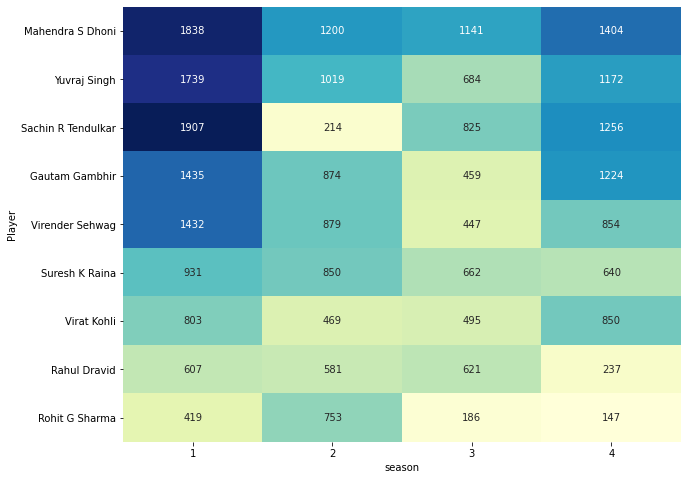

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(pt.drop('All', axis=1),cmap="YlGnBu", annot=True, fmt = '.4g', cbar=False)

In [24]:
pt = odi_india.pivot_table(index='Player', values='Century',columns= 'year',
               aggfunc=sum, fill_value=0,margins=True).sort_values(by="All", ascending=False).head(10)[1:]
pt

year,2006,2007,2008,2009,2010,2011,All
Player,,,,,,,
Sachin R Tendulkar,2,1,1,3,1,2,10
Yuvraj Singh,2,1,2,2,0,1,8
Gautam Gambhir,0,1,3,2,2,0,8
Virender Sehwag,0,1,1,3,1,1,7
Virat Kohli,0,0,0,1,3,3,7
Mahendra S Dhoni,0,1,1,2,1,0,5
Suresh K Raina,0,0,2,0,1,0,3
Rohit G Sharma,0,0,0,0,2,0,2
Yusuf K Pathan,0,0,0,0,1,1,2


<AxesSubplot:xlabel='Player'>

<Figure size 720x576 with 0 Axes>

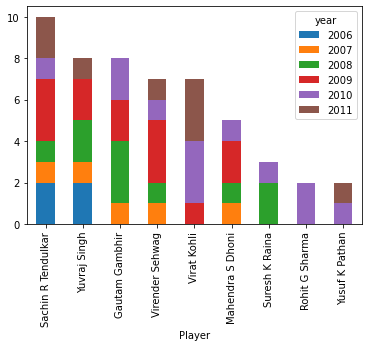

In [25]:
plt.figure(figsize=(10, 8))
pt.drop('All', axis=1).plot.bar(stacked=True)

<AxesSubplot:xlabel='year', ylabel='Player'>

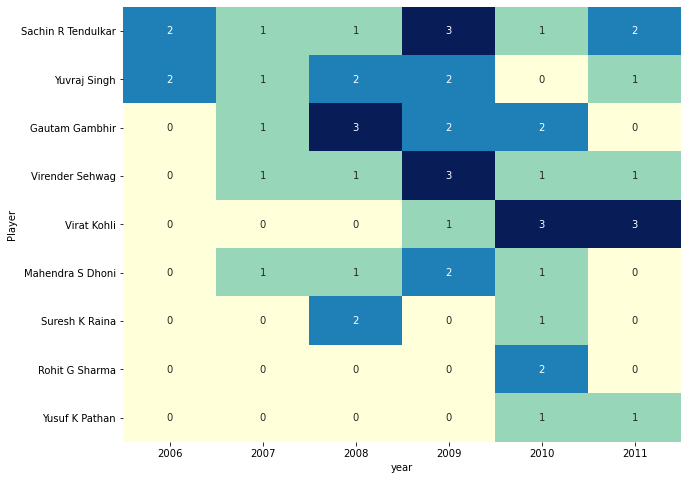

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(pt.drop('All', axis=1),cmap="YlGnBu", annot=True, cbar=False)

#### Analysis across all years

In [30]:
odi_india = odi[(odi.Country=='India')]

In [31]:
year_bins=[1990,2000,2005]
labels={0:'1974-1989',
        1:'1990-1999',
        2:'2000-2004',
        3:'2005 onwards'}

In [32]:
odi['year_bin']=odi['year'].apply(lambda v:np.digitize(v,bins=year_bins)).replace(labels)
odi['year_bin'].value_counts()

2005 onwards    17753
1990-1999       16278
2000-2004       11636
1974-1989       10259
Name: year_bin, dtype: int64

In [33]:
np.digitize([2004,1995,2005,2011],bins=year_bins)

array([2, 1, 3, 3], dtype=int64)

In [34]:
odi_india = odi[(odi.Country=='India')]

In [35]:
pt = odi_india.pivot_table(index='Ground', values='MatchDate',columns= 'year_bin',
               aggfunc=len, fill_value=0,margins=True).sort_values(by="All", ascending=False).head(10)[1:]
pt

year_bin,1974-1989,1990-1999,2000-2004,2005 onwards,All
Ground,,,,,
Sharjah CA Stadium,212,318,91,0,621
R. Premadasa Stadium,0,108,104,109,321
Bangabandhu National Stadium,25,59,85,0,169
Rangiri Dambulla International Stad.,0,0,18,137,155
"Cricket, Skating & Curling Club",0,154,0,0,154
M.Chinnaswamy Stadium,32,54,21,46,153
Eden Gardens,28,55,29,26,138
Sydney Cricket Ground,63,29,28,17,137
Melbourne Cricket Ground,73,18,30,12,133


<AxesSubplot:xlabel='year_bin', ylabel='Ground'>

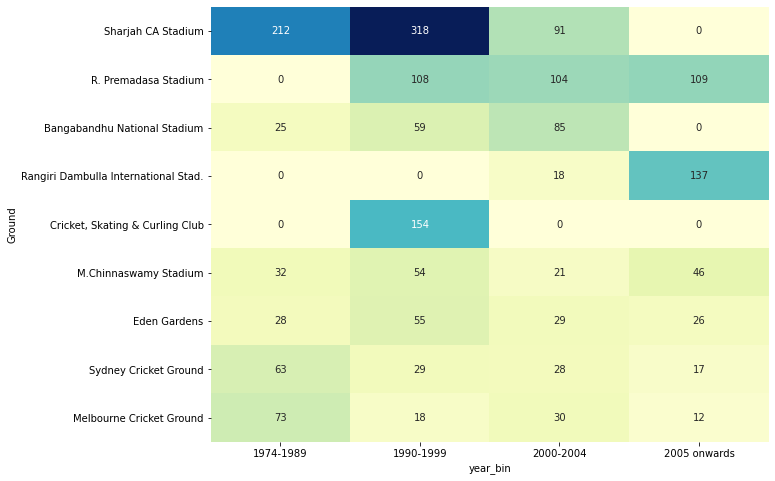

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(pt.drop('All', axis=1),cmap="YlGnBu", annot=True, fmt = '.4g', cbar=False)

### Analysis against Time

In [37]:
sachin_stat = odi[(odi.Player=='Sachin R Tendulkar')& (odi.year_bin!='1974-1989')]

In [38]:
sachin_stat.columns

Index(['Country', 'Player', 'Runs', 'ScoreRate', 'MatchDate', 'Ground',
       'Versus', 'URL', 'year', 'month', 'day', 'weekday', 'season', 'Century',
       'Fifty', 'Duckouts', 'Missed_Century', 'year_bin'],
      dtype='object')

<AxesSubplot:xlabel='year'>

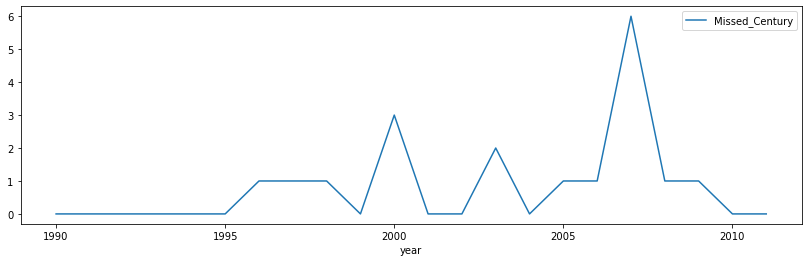

In [39]:
sachin_stat[['year','Missed_Century']].groupby('year').sum().plot.line(figsize=(14,4))

<AxesSubplot:xlabel='year'>

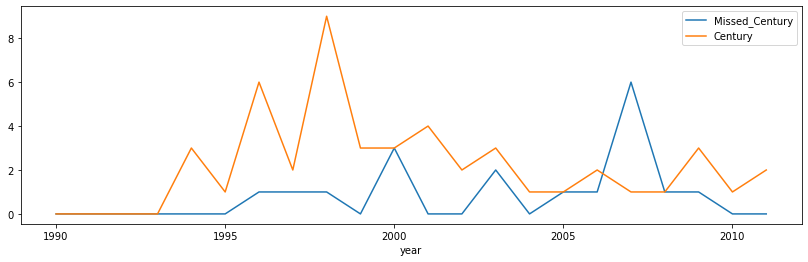

In [40]:
sachin_stat[['year','Missed_Century','Century']].groupby('year').sum().plot.line(figsize=(14,4))

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<AxesSubplot:xlabel='MatchDate'>

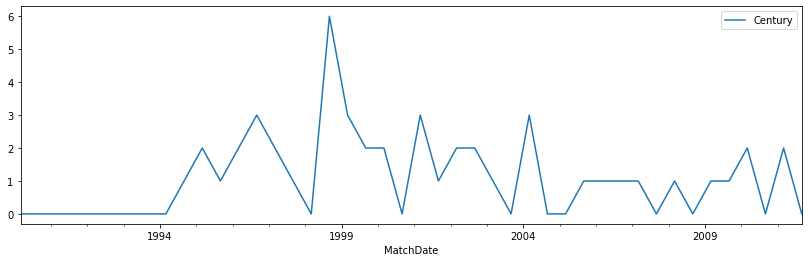

In [70]:
sachin_stat.resample(on='MatchDate',rule='6m').agg({"Century":"sum"}).plot.line(figsize=(14,4))

In [ ]:
https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4